<a href="https://colab.research.google.com/github/sameepshrestha/Mission-Chatbot/blob/main/data_prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow 
from tensorflow import keras
from keras import layers
import json 
import re 
import os

In [4]:
# data preprocessing 
# the main part of any machine learning is the data preprocessing 
# which includes both collection of the data and transforming this data into learnable input 

In [5]:
# first we deleted all the unnesseary dataset such as images and videos as these are not the parameters that 
# are to be learned 

In [80]:
datapath ='/content/drive/MyDrive/chat bots/messages/inbox'

def content_remover(contents):
    if re.search(r'^https?:\/\/',contents) or contents.startswith('ð')  or contents.startswith(''):
        return True
def cleaner (contents):
    contents= re.sub(r'ð','',contents)
    return contents
def facebook_data( datapath ):
    t_list = []
    count = 0 
    c = 0
    for direc in os.listdir(datapath):
        for dir in os.listdir(os.path.join(datapath,direc)):
            d_js = open(os.path.join(datapath,direc,dir))
            data = json.load(d_js)
            if (len(data['participants']) == 2) & (len(data['messages']) >= 4):
                participa=[ ]
                for name in data['participants']:
                    # print(name)
                    participa.append(name['name'])
                for messages in data['messages']:
                    if 'content' in messages.keys():
                        if not content_remover(messages['content']):
                            contents = cleaner(messages['content'])
                            if (messages['sender_name'] != participa[0]) & (messages['sender_name'][0].lower()  in 'abcdefghijklmnopqrstuvwxyz'): 
                                t_list.append([participa[1],participa[0],contents,messages['timestamp_ms']])
                            elif (messages['sender_name'] != participa[1]) & (messages['sender_name'][0].lower()  in 'abcdefghijklmnopqrstuvwxyz'):
                                t_list.append([participa[0],participa[1],contents,messages['timestamp_ms']])
    print(c)
    return t_list                


In [ ]:
t_list= facebook_data(datapath)
print(len(t_list))
t_list[:10]

In [82]:
data_set=pd.DataFrame(t_list,columns=['From','to','Message','timestamp_ms'])
dataset=data_set.sort_values('timestamp_ms')

In [83]:
data_set.to_csv (r'/content/drive/MyDrive/chat bots/export_dataframe.csv', index = False, header=True)

In [61]:
import pandas as pd
dataset = pd.read_csv(open('/content/drive/MyDrive/chat bots/export_dataframe.csv','rU'), encoding='utf-8', engine='c')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [62]:
friend_name = dataset['From'].unique()

In [63]:
dataset =dataset.sort_values('timestamp_ms')
dataset = dataset.reset_index(level=None,drop=True)
dataset = dataset.dropna()
dataset.tail(20)

,From,to,Message,timestamp_ms
149757,Narmada Dahal,Sameep Shrestha,Ani last ma chai,1.621313e+12
149758,Sameep Shrestha,Narmada Dahal,ah tyo chai lastai ajha sunana,1.621313e+12
149759,Narmada Dahal,Sameep Shrestha,Tapai jun thau ma hoisincha tei thau najik ko ...,1.621313e+12
149760,Sameep Shrestha,Narmada Dahal,hsptlma navako yo celebrity sanga oxygen tanke...,1.621313e+12
149761,Sameep Shrestha,Narmada Dahal,ma confuse vairaxu tyo chai,1.621313e+12
149762,Narmada Dahal,Sameep Shrestha,Hamri ma nai chað¤£,1.621313e+12
149763,Narmada Dahal,Sameep Shrestha,Oxygen cylinder le ama lai tyo ausi ko raat ch...,1.621313e+12
149764,Narmada Dahal,Sameep Shrestha,Tara 24hr duty le last garho oaryo,1.621313e+12
149765,Narmada Dahal,Sameep Shrestha,Buda budi ekchin mai pipe fyalne naak bata,1.621313e+12
149766,Narmada Dahal,Sameep Shrestha,Tharkayera hos dhamkyayera fakayera launa parne,1.621313e+12


count of messages you've received from other users

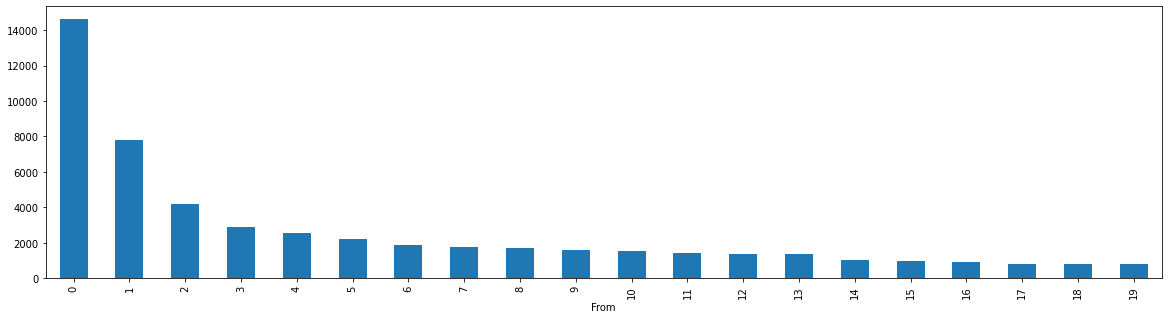

In [139]:
ax=dataset.groupby(['From'])['Message'].count().sort_values(ascending=False)[1:21].plot(kind='bar',figsize=(20,5))
x_labels=range(20)
ax.set_xticklabels(x_labels)
plt.show()


count of messages you've send to other users

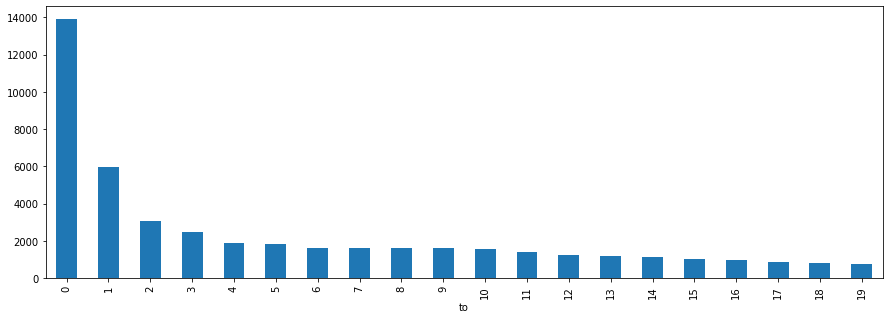

In [141]:
ax=dataset[dataset['From']=='Sameep Shrestha'].groupby(['to'])['Message'].count().sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(15,5))
x_labels=range(20)
ax.set_xticklabels(x_labels)
plt.show()

In [5]:
|def combined_dataset (data):
    result = data['From'][0]
    result2 = data['to'][0]
    result3 = data['Message'][0]
    print(result)
    new = []
    for fro,to,messa,time in zip(data['From'][1:],data['to'][1:],data['Message'][1:],data['timestamp_ms'][1:]):
        if (result==fro and result2 == to) :
            result3 = result3 + ' ' +messa
        else:
            new.append([result,result2,result3,time])
            print(result3)
            result = fro
            result2 = to 
            result3 = messa
    return new

In [ ]:

data =combined_dataset(dataset)


In [59]:
clen_arranged_data = pd.DataFrame(data,columns=['From','to','Message','timestamp_ms'])
clen_arranged_data.tail(10)

,From,to,Message,timestamp_ms
94246,Sameep Shrestha,Narmada Dahal,afnai ghar bata khedairaxan,1.621313e+12
94247,Narmada Dahal,Sameep Shrestha,Kasle,1.621313e+12
94248,Sameep Shrestha,Narmada Dahal,tyai pani supreme courtla pass gardera israel ...,1.621313e+12
94249,Narmada Dahal,Sameep Shrestha,Myan yo fb ma ambukance kk nunber rakherw naut...,1.621313e+12
94250,Sameep Shrestha,Narmada Dahal,ah tyo chai lastai ajha sunana,1.621313e+12
94251,Narmada Dahal,Sameep Shrestha,Tapai jun thau ma hoisincha tei thau najik ko ...,1.621313e+12
94252,Sameep Shrestha,Narmada Dahal,hsptlma navako yo celebrity sanga oxygen tanke...,1.621313e+12
94253,Narmada Dahal,Sameep Shrestha,Hamri ma nai chað¤£ Oxygen cylinder le ama la...,1.621313e+12
94254,Sameep Shrestha,Narmada Dahal,kakaslai lageko oxygen fill garera rakheko ho,1.621313e+12
94255,Narmada Dahal,Sameep Shrestha,Day 1 duita mini cylinder Tespachi generator K...,1.621313e+12


In [9]:
clen_arranged_data.to_csv (r'/content/drive/MyDrive/chat bots/simultaneous.csv', index = False, header=True)

what we've done so far is 

1.   removed links and empty messages
2.   we've also tried to remove the emoji present 
3.   Since there are many time where A messages 3 or 4 times befor a reply so we have arranged that in the form of A-(single message) B-(single reply message) combining those three messages 

Things To Do 


*   make a trainable dataset with Message and reply

*   create a trainable array with the message and reply for the model 
*   use word2vec model taking all the words to get the word vector 





In [51]:
def dataset_final(data):
    messages = []
    requests = []
    From =[]
    c=0
    for fro, to, message, time in  zip(data['From'][0:],data['to'][0:],data['Message'][0:],data['timestamp_ms'][0:]):
        if fro !='Sameep Shrestha':
            c = 1
            y = fro
            mess = message
        elif c == 1 and to == y :
            c = 0
            messages.append(mess)
            requests.append(message)
            From.append(y)
    return messages,requests,From
        # else:
        #     c=0:
    
    

In [52]:
messages,reply,From = dataset_final(clen_arranged_data)

In [53]:
len(messages), len(reply),len(From)

(37637, 37637, 37637)

In [58]:
 final_dataset = pd.DataFrame(data=list(zip(From,messages,reply)),columns=['From','Message','reply'])
 final_dataset.head()

,From,Message,reply
0,Puspa Rai,O ho k x hou,Thik. Xa
1,Dipesh Chapagain,Hi Science test tomarrow,hlo \ni am a friend of sameep...
2,Spponge Bob,hhahaha sale malai k taha :D talai taha theyo ...,Ah ta aja tst ma gad
3,Spponge Bob,hhahahhaa k test ma pass hunxas ta :D,Xup pas ta humxu ful marks audaina bujis
4,Spponge Bob,hhahhaha :D :D sale maile tero wall pic hali d...,Ha kasari xange hanu pas


In [60]:
final_dataset.to_csv (r'/content/drive/MyDrive/chat bots/final_dataset.csv', index = False, header=True)